# 1D Density profiles

This notebook illustrates the use of the multiple density profiles available in 1D ZPIC. Just uncomment the required line below the `# Density profile` line in the next cell to choose the density type to test.

In [1]:
import em1d
import numpy as np

# Custom density profile
def custom_n0(x):
    return 1.0 + 0.5*np.sin(2*x/np.pi)*np.sin(x/np.pi) 

# Time step
dt = 0.019
tmax = 10.0

# Simulation box
nx  = 64
box = 20.0

# Diagnostic frequency
ndump = 100

# Density Profile
#density = em1d.Density( type = "uniform" )
#density = em1d.Density( type = "step", start = 17.5 )
#density = em1d.Density( type = "slab", start = 17.5, end = 22.5 )
#density = em1d.Density( type = "ramp", start = 17.5, end = 22.5, ramp = [1.0,2.0] )
density = em1d.Density( type = "custom", custom = custom_n0 )

# Background plasma
electrons = em1d.Species( "electrons", -1.0, 128, density = density )

# Initialize simulation data
sim = em1d.Simulation( nx, box, dt, species = electrons )

# Set moving window
sim.set_moving_window()

# Run the simulation
sim.run( tmax )


Running simulation up to t = 10 ...
n = 527, t = 10.013
Done.


### Charge Density

In [2]:
import matplotlib.pyplot as plt

charge = np.abs(electrons.charge())

xmin = sim.dx/2
xmax = sim.box - sim.dx/2

plt.plot(np.linspace(xmin, xmax, num = sim.nx), charge ) 
plt.xlabel("x1")
plt.ylabel("|rho|")
plt.title("Absolute charge density\nt = {:g}".format(sim.t))

plt.grid(True)
plt.show()

<Figure size 640x480 with 1 Axes>

# 2D Density profiles

This notebook illustrates the use of the multiple density profiles available in 2D ZPIC. Just uncomment the required line below the `# Density profile` line in the next cell to choose the density type to test.

In [10]:
import em2d as zpic
import numpy as np

# Custom density profiles along x and y
def nx(x):
    if (abs(x-1)<0.2):
        return 1.0 
    else:
        return 0
#    return 1.0 + 0.5*np.sin(2*x/np.pi) 

def ny(y):
    return 1.0 + 0.5*np.cos(2*y/np.pi) 

# Time step
dt = 0.07
tmax = 0.07

# Density Profile
#density = zpic.Density( type = "uniform" )
#density = zpic.Density( type = "step", start = 6.4 )
density = zpic.Density( type = "slab", start = 0.8, end = 1.2 )
#density = zpic.Density( type = "custom", custom_x = nx )


# Background plasma
electrons = zpic.Species( "electrons", -1.0, ppc = [1,1], density = density )

# Initialize simulation data
sim = zpic.Simulation( nx = [128,128], box = [12.8,12.8], dt = 0.07, 
                       species = electrons )

# Run the simulation
sim.run( tmax )


Running simulation up to t = 0.07 ...
n = 2, t = 0.14
Done.


### Charge Density

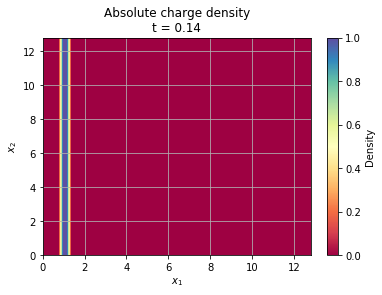

In [11]:
import matplotlib.pyplot as plt

charge = np.abs(electrons.charge())
range = [[0,sim.box[0]],[0,sim.box[1]]]

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.imshow( charge, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'Spectral' )
plt.colorbar().set_label('Density')

plt.title("Absolute charge density\nt = {:g}".format(sim.t))

plt.grid(True)
plt.show()

In [12]:
import em2d as zpic
import numpy as np

# Custom density profiles along x and y
def nx(x):
    if (abs(x-1)<0.2):
        return 1.0 
    else:
        return 0
#    return 1.0 + 0.5*np.sin(2*x/np.pi) 

def ny(y):
    return 1.0 + 0.5*np.cos(2*y/np.pi) 

# Time step
dt = 0.07
tmax = 0.07

# Density Profile
#density = zpic.Density( type = "uniform" )
#density = zpic.Density( type = "step", start = 6.4 )
#density = zpic.Density( type = "slab", start = 3.2, end = 9.6 )
density = zpic.Density( type = "custom", custom_x = nx )


# Background plasma
electrons = zpic.Species( "electrons", -1.0, ppc = [1,1], density = density )

# Initialize simulation data
sim = zpic.Simulation( nx = [128,128], box = [12.8,12.8], dt = 0.07, 
                       species = electrons )

# Run the simulation
sim.run( tmax )


Running simulation up to t = 0.07 ...
n = 2, t = 0.14
Done.


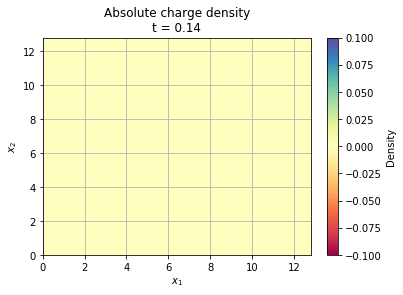

In [13]:
import matplotlib.pyplot as plt

charge = np.abs(electrons.charge())
range = [[0,sim.box[0]],[0,sim.box[1]]]

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.imshow( charge, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'Spectral' )
plt.colorbar().set_label('Density')

plt.title("Absolute charge density\nt = {:g}".format(sim.t))

plt.grid(True)
plt.show()